### Ej 4
### Ramanujan

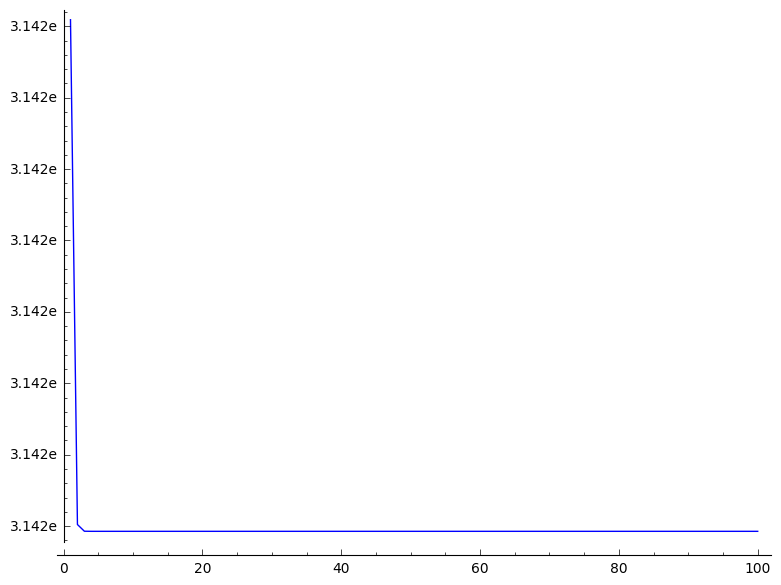

In [14]:
'''La funcion guarda en una lista el resultado de la serie asociado
a cada limite superior entre 0 y un n dado'''
def suma(n):
    L = []
    suma = 0
    for i in srange(0, n+1):
        a = 2*i
        a = (factorial(a))^3
        a = a * (42*i + 5)
        a = a / (factorial(i)^6)
        a = a / (16^(3*i + 1))
        suma = suma + a
        if i > 0:
            L.append((i, 1/suma))
        
    return L

n = 100
show(line2d(suma(n)))


    

La siguiente función crea una lista de pares $(i, j)$ donde $i$ es el 
punto hasta el cual hay que desarrollar la serie para obtener una 
precision de $j$ bits en $\pi$

$ sup_1$ es el máximo índice superior hasta el que vamos a desarrollar el  sumatorio $\sum_{i=0}^{sup_1}$

$ sup_2$ es la máxima precisión que vamos a comprobar si el falso-$\pi$ devuelto por la serie tiene

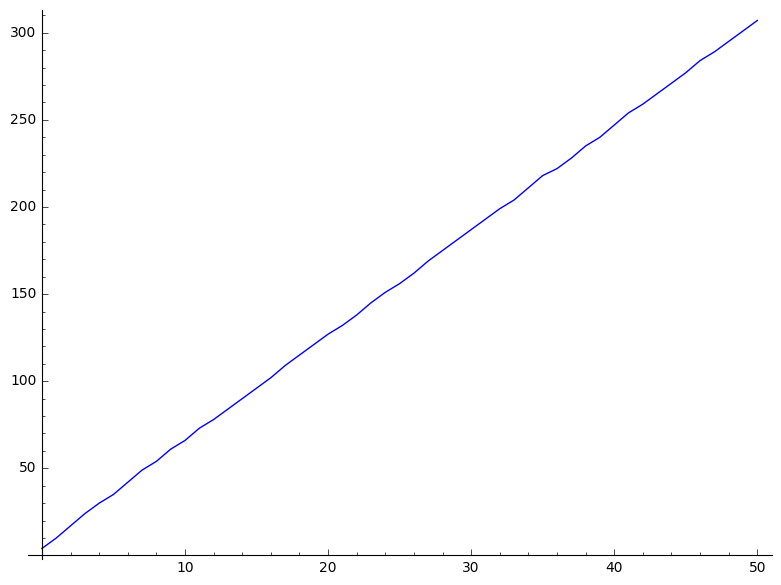

In [21]:
def precision_vs_n(sup1, sup2):
    L = []
    precision_anterior = 1
    
    '''Que falso-pi obtenemos al aniadir cada sumando?'''
    suma = 0
    for i in srange(0, sup1+1):
        a = 2*i
        a = (factorial(a))^3
        a = a * (42*i + 5)
        a = a / (factorial(i)^6)
        a = a / (16^(3*i + 1))
        suma = suma + a
        
        '''Cuanta precision tenemos?
        (para optimizar: es, como minimo, la que teniamos antes)'''
        j = sup2
        p = N(pi, prec = j)
        while(j > precision_anterior and p != 1/suma):
            p = N(pi, prec = j)
            if(p == 1/suma):
                L.append((i, j))
                precision_anterior = j
            j = j - 1
    return L

sup1 = 50
sup2 = 320
grafica =  precision_vs_n(sup1, sup2)
show(line2d(grafica))
        
        
        
        

La gráfica muestra que la relación entre la precisión que queremos tener en el cálculo de $\pi$ y el punto hasta el cual desarrollamos la suma es lineal. Parece ser una recta de pendiente $m \approx 6$ 

In [1]:
find_fit?

In [23]:
saaaaaaaaaaaaaaaaaaaaa98

[m == 6.035294117658041, n == 5.627450980402241]

Efectivamente, parece ser la recta

$f(x) = 6.035x + 5.627$

### Ej 5
### Salamin y Brent vs. Ramanujan 

Construimos dos funciones que nos relacionen la precision en $\pi$ obtenida con el tiempo necesitado para obtenerla

In [24]:
cputime?

In [29]:
def tiempo_ramanujan(sup1, prec):
    p = N(pi, prec = prec)
    t1 = cputime(subprocesses = True)
    suma = 0
    for i in srange(0, sup1+1):
        a = 2*i
        a = (factorial(a))^3
        a = a * (42*i + 5)
        a = a / (factorial(i)^6)
        a = a / (16^(3*i + 1))
        suma = suma + a
        if 1/suma == p:
            t2 = cputime(subprocesses = True)
            if prec == 100:
                show( i)
            return t2 - t1
    return -1

def tiempo_salamin(sup2, prec):
    p = N(pi, prec = prec)
    t1 = cputime(subprocesses = True)
    
    a = 1
    b = N(sqrt(2), prec = 100)/2
    s = 1/2
    pk = 4
    k = 1
    while(pk > p and k <= sup2):
        '''Calculamos valor de pk'''
        next_a = (a + b)/2
        next_b = N(sqrt(a * b), prec = 100)
        c = next_a ^2 - next_b ^2
        next_s = s - c * (2^k)
        pk = (2 * next_a ^2)/next_s
        
        '''Actualizamos valor de a, b, s, k'''
        a = next_a
        b = next_b
        s = next_s
        k = k + 1
        '''Como la sucesion pk es decreciente, tomamos que ha alcanzado la
        precision deseada cuando pk <= N(pi)'''
        if p >= pk:
            t2 = cputime(subprocesses = True)
            if prec == 100:
                show( k)
            return t2 - t1
    return -1


16

6

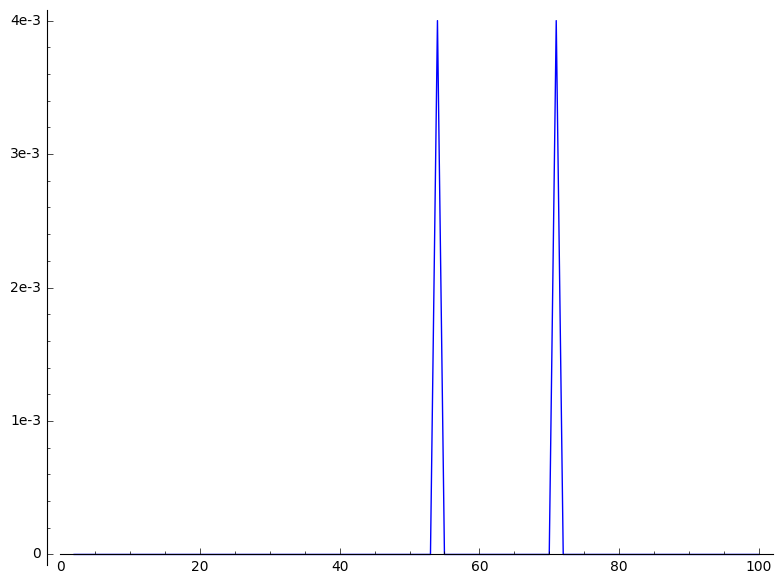

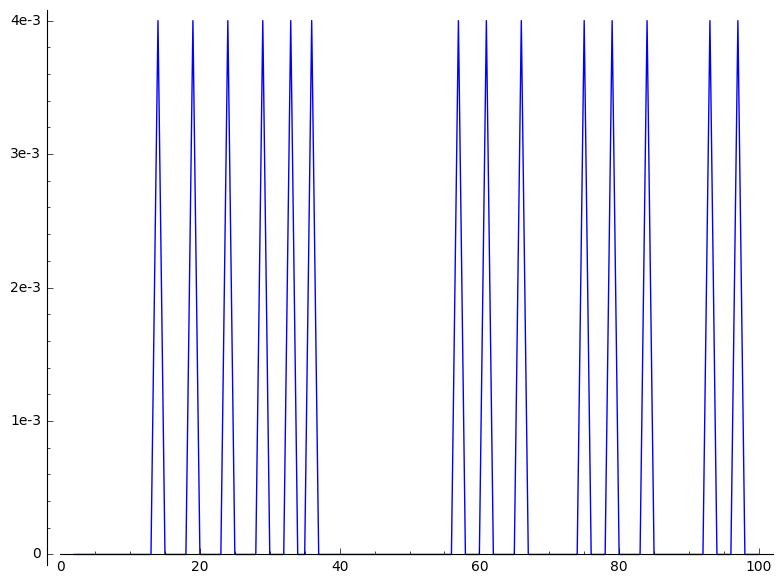

In [31]:
n = 100
sup = 300
L_r = []
L_s = []
for prec in srange(2, n+1):
    L_r.append((prec, tiempo_ramanujan(sup, prec)))
    L_s.append((prec, tiempo_salamin(sup, prec)))

show(line2d(L_r))
show(line2d(L_s))

En las gráficas no se aprecia una gran diferencia en el tiempo requerido para el cálculo de $\pi$. La máxima precisión buscada es la máxima que sage permite, 100 bits.

Para todas las precisiones, con ambos métodos el tiempo es muy bajo y el ordenador interpreta muchos como 0. Como hay "más ceros" en el algoritmo de Ramanujan, deducimos que éste es más eficiente en cuanto a tiempo.

Sí es cierto que, a pesar de tardar más o menos lo mismo, el algoritmo de *Salamin y Brent* necesita muchas menos iteraciones (sólo 6) que la serie de *Ramanujan* (16) para alcanzar la precisión de 100 bits en $\pi$